# Korki drogowe

## Spis treści
1. [Wstęp](#1)
2. [Podstawowy model](#2)
3. [Dopasowanie modelu do rzeczywistego skrzyżowania](#3)
4. [Rozszerzenie modelu o czas reakcji kierowcy](#4)
5. [Inne przykłady zastosowania modelu](#5)

## Wstęp<a class="anchor" id="1"></a>
Korek drogowy – zatrzymanie lub znaczne spowolnienie ruchu na drodze, które spowodowane jest nadmiernym ruchiem drogowym.

## Podstawowy model <a class="anchor" id="4"></a>
W rozpatrywanym nami przypadku korki są po to, że liczba aut, które mogą przejechać za czas zielonego światła jest znacznie mniejsza od tej, ile aut stoi przed skrzyżowaniem.

Mamy prosty przykład. Do świateł dojeżdża 85 aut, włącza się zielone światło, świeci się przez 30 s. Za ten czas skrzyżowanie mija 56 aut, 29 pozostają. Znów dojeżdża jakaś ilość aut, wiemy, że wszystkie nie zdążą przejechać przez światła. 

Im więcej aut dojedzie do swiateł, tym więcej tam zostanie, a znaczy, że rozpocznie się robić korek, który szybko się wydłuży. To będzie się dziać do tego momentu, aż liczba aut, dojeżdżających do korka nie zacznie maleć.
Teraz spróbujemy zapisać równanie, opisujące tą sytuację.

Niech $v_{śr}$ - średnia prędkość aut, dojeżdżających do korka, $L$ - długość korka, $g(t)$ - gęstość ruchu w czasie, $p(t)$ - dlugość pokotu aut, które odjeżdżają od korka w czasie.
$$g(t) = \frac{a\cdot r}{v_{śr} \cdot t}, $$ 
$$p(t) = \frac{a\cdot r}{t}, $$ 
gdzie $a$ - ilość aut, $t$ - mierzony czas, $r$ - średnia długość samochodu i odstępu do drugiego samochodu, $ \left( v_{śr} + L' \right)\cdot g(t)$ - ilość aut dojeżdżających do korka.

Równanie opisujące długość korka ma postać
$$ L' = \left( v_{śr} + L' \right) \cdot g(t) - p(t). $$
Po przekształceniu otrzymujemy
$$ L' = \frac{v_{śr}\cdot g(t) - p(t)}{1 - g(t)}. $$
Rozwiązując równanie mamy
$$ L = \int \frac{v_{śr}\cdot g(t) - p(t)}{1 - g(t)} \mathrm{d}t + L_{0}, $$
gdzie $L_{0}$ - początkowy korek(jeśli on jest).

## Dopasowanie modelu do rzeczywistego skrzyżowania <a class="anchor" id="3"></a>

In [1]:
using Plots
using LsqFit

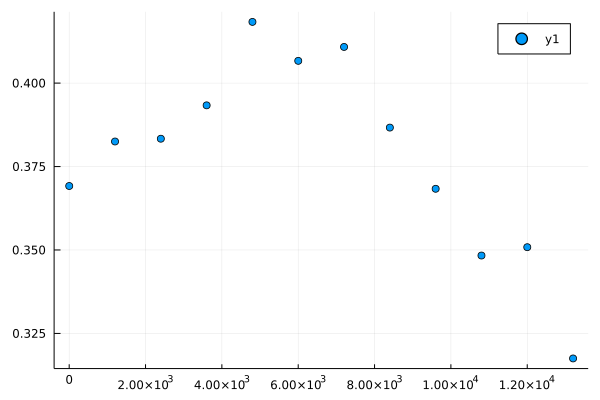

In [6]:
data = [443, 459, 460, 472, 502, 488, 493, 464, 442, 418, 421, 381]
n_data = data ./ 1200
scatter(1:1200:14400, n_data)

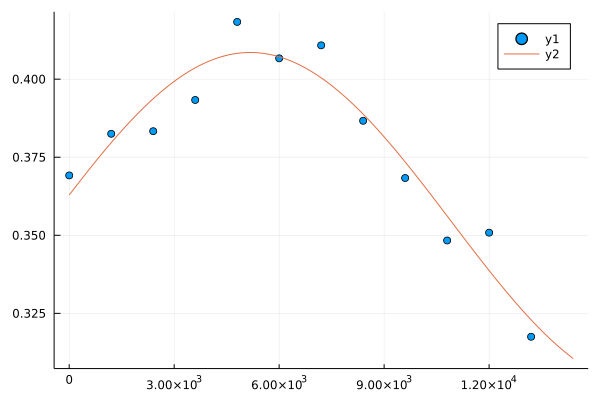

In [3]:
n_mod(x, p) = p[1] .* sin.(p[2] .* x .+ p[3]) .+ p[4]
n_fit = curve_fit(n_mod, 1:1200:14400, n_data, [1.0, 0.0005, 0.0, 0.0])

scatter(1:1200:14400, n_data)
T = 1:14400
plot!(T, n_mod(T, n_fit.param))

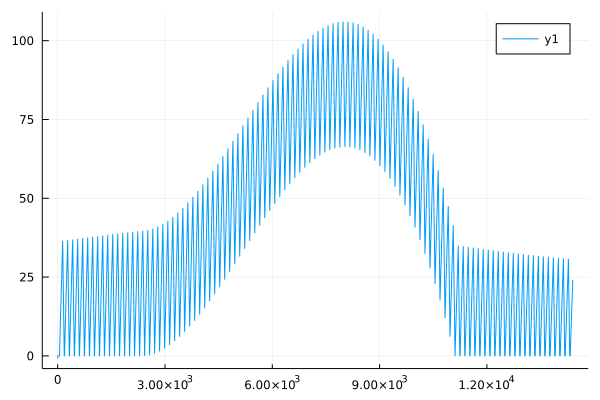

In [4]:
n(x, p) = p[1] * sin(p[2] * x + p[3]) + p[4]

function p(t)
    if t % 140 < 50
        return 1.1
    else
        return 0.0
    end
end

T = 14400
r = 3.58
v_śr = 13.21

dL = (n_mod(1:T, n_fit.param) .- p.(1:T)) ./ (1 .- r .* n_mod(1:T, n_fit.param)/v_śr)

L = [dL[1]]
for t in 2:T
    l = L[t-1] + dL[t]
    if l <= 0
        append!(L, 0)
    else
        append!(L, l)
    end
end

plot(1:T, L)

## Rozszerzenie modelu o czas reakcji kierowcy <a class="anchor" id="4"></a>
Poprzednie równanie opisywało długość korka przy założeniu, że wszystkie auta ruszają jednocześnie. Z doświadczenia wiemy, że w rzeczywistości jest inaczej. Auta ruszają jedno za drugim z pewnym opóźnieniem, które nazywane jest czasem reakcji. W wyniku tego powstaje zjawisko zwane falą drogową (ang. traffic wave).

Żeby lepiej zrozumieć to zjawisko rozpatrzmy przykład. Z powodu czerwonych świateł utworzył się korek. Gdy pojawia się zielone światło, pierwsze auto rusza, następnie po czasie reakcji rusza kolejne itd. Powstaje wcześniej wspomniana fala drogowa, która porusza się z jakąś prędkością $v_f$. Ostatnie auto ruszy dopiero, gdy fala ta dotrze do niego, czyli pokona odległość równą długości korka. Widzimy zatem, że korek skróci się po pewnym czasie $\Delta t$ od zapalenia się zielonych świateł.

Ponieważ czas $\Delta t$ to czas w jakim fala poruszająca się ze stałą predkością $v_f$ pokona długość korka $L$, to $$\Delta t = \frac{L}{v_f}.$$
Wtedy przepływ w momencie $t$ będzie równy $p(t - \Delta t) = p\left(t - \frac{L}{v_f}\right)$.

Rozważmy teraz przypadek, w którym w momencie $t = 0$ utworzył się korek o długości $L_0$ oraz natężenie od tego momentu jest zerowe. Mamy jedynie przepływ $p(t - \frac{L}{v_f})$.  Wtedy długość korka można opisać równaniem
$$ L = L_0 - \int_{0}^{\gamma}p(\tau) \mathrm{d}\tau, $$
gdzie $\gamma = t - \frac{L}{v_f}$. Po zróżniczkowaniu obustronnie względem $\gamma$ otrzymujemy
$$ \frac{dL}{d\gamma} = - p(\gamma). $$
Następnie domnażamy $\frac{d\gamma}{dt}$ i upraszczamy,
$$ \frac{dL}{d\gamma} \frac{d\gamma}{dt} = - p(\gamma) \frac{d\gamma}{dt}, $$
$$ \frac{dL}{dt} = - p(\gamma) \frac{d}{dt} \left(t - \frac{L}{v_f}\right), $$
$$ L' = - \left(1 - \frac{L'}{v_f}\right) p\left(t - \frac{L}{v_f}\right). $$
W ten spośob otrzymaliśmy postać, jaką ma przepływ w modelu z opóźnieniem. Teraz możemy sformułować pełne równanie zawierające natężenie i przepływ. Ponieważ opóźnienie $\Delta t$ nie wpływa na przyrost nowych samochodów, będzie on taki sam jak w pierwszym modelu tj. $ \left( v_{śr} + L' \right) \cdot g(t) $. Zatem równanie opisujące długość korka będzie mieć postać
$$ L' = r \left( v_{śr} + L' \right) \cdot g(t) - r \left(1 - \frac{L'}{v_f}\right) \cdot p\left(t - \frac{L}{v_f} \right). $$
Po przekształceniu otrzymujemy
$$ L' = \frac{v_{śr} \cdot g(t) - p\left(t - \frac{L}{v_f}\right)}{\frac{1}{r} - g(t) - \frac{1}{v_f} p \left(t - \frac{L}{v_f} \right)}. $$

In [5]:
L = [0.0]
n(x, p) = p[1] * sin(p[2] * x + p[3]) + p[4]
#v_f = 6.36
v_f = 6.36
v_śr = 13.21
r = 3.58
T = 14400
a = 0.1  # Accuracy

function p(t)
    if t % 140 < 50
        return 1.11
    else
        return 0.0
    end
end

for t in a:a:T-a
    index = Int(round(t/a))
    dL = a * (n(t, n_fit.param) - p(t - L[index]/v_f)) / (1/r - n(t, n_fit.param)/v_śr - p(t - L[index]/v_f)/v_f)
    l = L[index] + dL
    if l <= 0
        append!(L, 0)
    else
        append!(L, l)
    end
end

plot(a:a:T, L)